# **Análisis exploratorio de datos (EDA) sobre casos y seguimientos de salud en Colombia**

## **1. Instalación de librerías**

Para asegurarnos de que tenemos todas las dependencias necesarias, ejecutamos:

```python
!pip install pandas matplotlib seaborn requests
```

In [ ]:
!pip install pandas matplotlib seaborn requests

In [ ]:
!pip install fpdf

from fpdf import FPDF
from google.colab import files

## **2. Importación de librerías**

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from google.colab import files
import os

## **3. Carga de datos desde la API**


In [ ]:
# URL de la API
data_url = "https://www.datos.gov.co/resource/tfrs-6dfb.json"

# Realizar la solicitud GET a la API
response = requests.get(data_url)

# Convertir los datos a un DataFrame
data = response.json()
df = pd.DataFrame(data)

# Mostrar las primeras filas
df.head()

,fuente,fecharegistro,fecharegistrosemana,departamento,municipio,entidadregistro,numerocasos,numeroseguimientos,seguimientosporcaso,fechacorte
0,CONFIRMADOS,2022-01-12T00:00:00.000,2,08 - ATLÁNTICO,08421 - LURUACO,NUEVA EPS S.A.,1,2,20000000000000000000,2022-05-25T00:00:00.000
1,CONFIRMADOS,2021-07-27T00:00:00.000,30,25 - CUNDINAMARCA,25317 - GUACHETÁ,NUEVA EPS S.A.,6,8,13333333333333300000,2022-05-25T00:00:00.000
2,CONFIRMADOS,2021-04-20T00:00:00.000,16,52 - NARIÑO,52356 - IPIALES,POLICIA NACIONAL,1,5,50000000000000000000,2022-05-25T00:00:00.000
3,CONFIRMADOS,2021-05-11T00:00:00.000,19,94 - GUAINÍA,94001 - INÍRIDA,MEDIMAS EPS SAS,1,3,30000000000000000000,2022-05-25T00:00:00.000
4,CONFIRMADOS,2021-05-24T00:00:00.000,21,76 - VALLE DEL CAUCA,76520 - PALMIRA,E.P.S. SANITAS S.A.,3,12,40000000000000000000,2022-05-25T00:00:00.000


## **4. Exploración inicial de los datos**


In [ ]:
# Información sobre los tipos de datos
df.info()

# Resumen estadístico de las columnas numéricas
df.describe()

# Verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fuente               1000 non-null   object
 1   fecharegistro        1000 non-null   object
 2   fecharegistrosemana  1000 non-null   object
 3   departamento         1000 non-null   object
 4   municipio            1000 non-null   object
 5   entidadregistro      1000 non-null   object
 6   numerocasos          1000 non-null   object
 7   numeroseguimientos   1000 non-null   object
 8   seguimientosporcaso  1000 non-null   object
 9   fechacorte           1000 non-null   object
dtypes: object(10)
memory usage: 78.3+ KB


,0
fuente,0
fecharegistro,0
fecharegistrosemana,0
departamento,0
municipio,0
entidadregistro,0
numerocasos,0
numeroseguimientos,0
seguimientosporcaso,0
fechacorte,0


## **5. Transformación de Datos**


In [ ]:
# Convertir fechas a formato datetime
df['fecharegistro'] = pd.to_datetime(df['fecharegistro'], errors='coerce')
df['fechacorte'] = pd.to_datetime(df['fechacorte'], errors='coerce')

# Convertir variables numéricas
df['numerocasos'] = pd.to_numeric(df['numerocasos'], errors='coerce')
df['numeroseguimientos'] = pd.to_numeric(df['numeroseguimientos'], errors='coerce')
df['seguimientosporcaso'] = pd.to_numeric(df['seguimientosporcaso'], errors='coerce')

In [ ]:
# Resumen estadístico de las columnas numéricas
print(df.describe())

# Conteo de valores únicos por columna categórica
for col in ['fuente', 'departamento', 'municipio', 'entidadregistro']:
    print(f"{col}: {df[col].nunique()} valores únicos")


                       fecharegistro  numerocasos  numeroseguimientos  \
count                           1000  1000.000000         1000.000000   
mean   2021-06-22 18:21:35.999999744     8.788000           33.916000   
min              2021-01-01 00:00:00     1.000000            1.000000   
25%              2021-03-04 00:00:00     1.000000            2.000000   
50%              2021-05-19 00:00:00     1.000000            5.000000   
75%              2021-09-14 00:00:00     4.000000           14.000000   
max              2022-04-28 00:00:00   825.000000         3702.000000   
std                              NaN    38.418863          161.132221   

       seguimientosporcaso           fechacorte  
count         1.000000e+03                 1000  
mean          3.890047e+19  2022-05-25 00:00:00  
min           1.000000e+19  2022-05-25 00:00:00  
25%           1.267045e+19  2022-05-25 00:00:00  
50%           2.316667e+19  2022-05-25 00:00:00  
75%           4.354167e+19  2022-05-25 00:

## **6. Análisis visual**
### **Distribución de casos reportados**


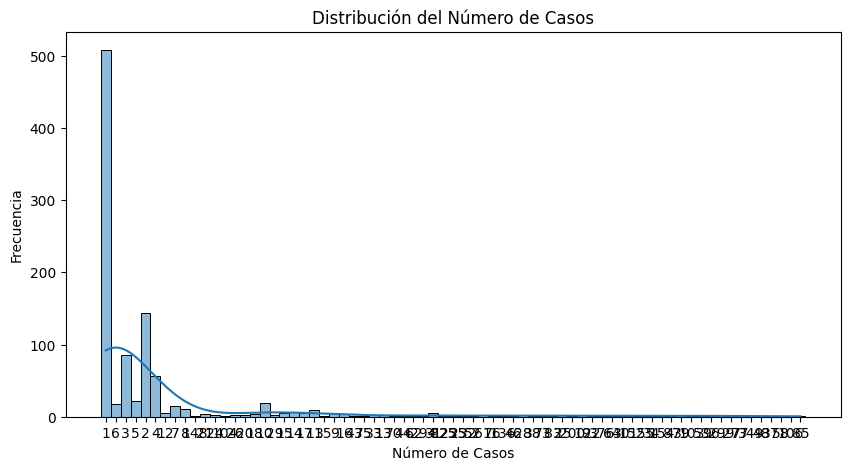

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['numerocasos'], bins=30, kde=True)
plt.title("Distribución del Número de Casos")
plt.xlabel("Número de Casos")
plt.ylabel("Frecuencia")
plt.savefig("histograma_casos.png")
plt.show()

### **Casos por Departamento**


<ipython-input-63-60b70cd41609>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dep_casos, x='departamento', y='numerocasos', palette="viridis")


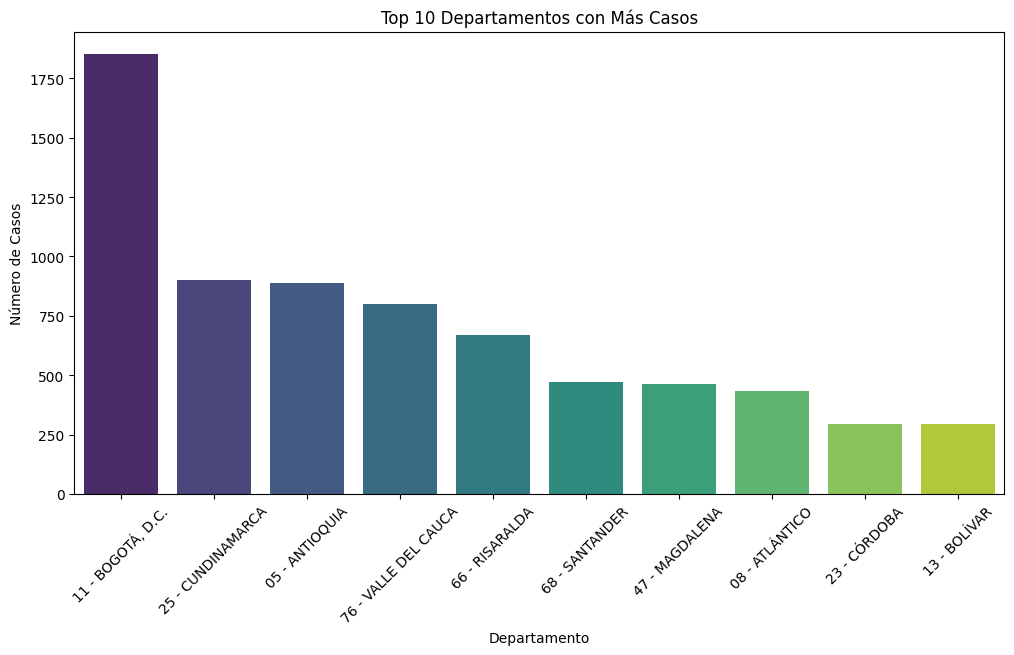

In [ ]:
dep_casos = df.groupby('departamento', as_index=False)['numerocasos'].sum().sort_values(by='numerocasos', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=dep_casos, x='departamento', y='numerocasos', palette="viridis")
plt.title("Top 10 Departamentos con Más Casos")
plt.xlabel("Departamento")
plt.ylabel("Número de Casos")
plt.xticks(rotation=45)
plt.savefig("barras_departamentos.png")
plt.show()

### **Evolución temporal de casos**


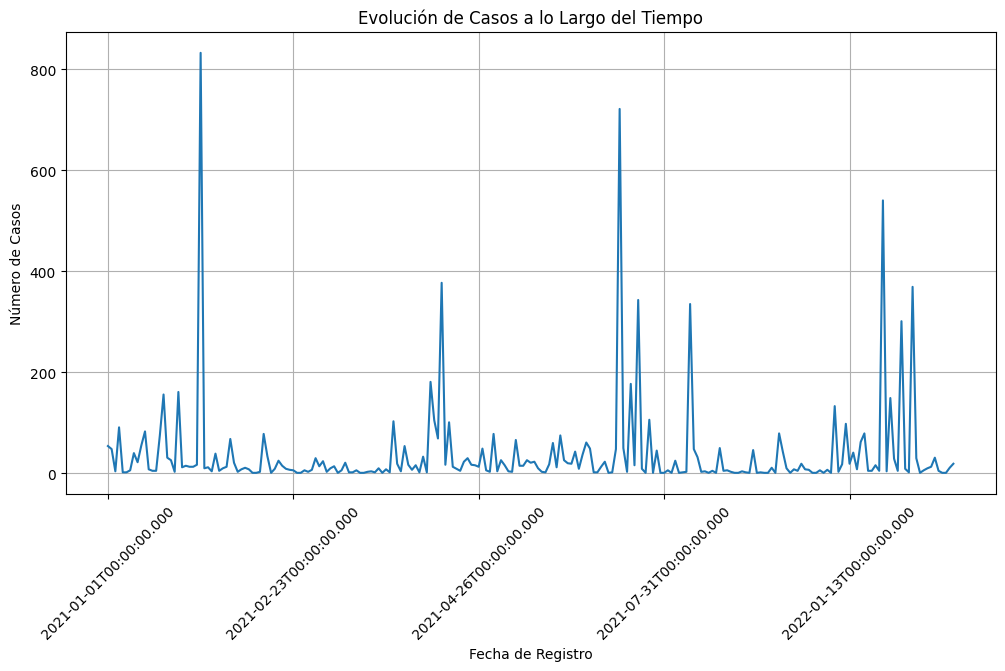

In [ ]:
plt.figure(figsize=(12, 6))
df_time_series = df.groupby(df['fecharegistro'].dropna())['numerocasos'].sum()
df_time_series.plot()
plt.title("Evolución de Casos a lo Largo del Tiempo")
plt.xlabel("Fecha de Registro")
plt.ylabel("Número de Casos")
plt.grid()
plt.xticks(rotation=45)
plt.savefig("evolucion_temporal.png")
plt.show()

## **7. Análisis de Correlación**


In [ ]:
# Ver valores únicos en numerocasos para identificar texto
print(df['numerocasos'].unique())

# Convertir valores erróneos a NaN y luego a número
df['numerocasos'] = pd.to_numeric(df['numerocasos'], errors='coerce')
df['numeroseguimientos'] = pd.to_numeric(df['numeroseguimientos'], errors='coerce')
df['seguimientosporcaso'] = pd.to_numeric(df['seguimientosporcaso'], errors='coerce')

['1' '6' '3' '5' '2' '4' '12' '7' '8' '148' '21' '24' '104' '26' '20' '18'
 '10' '29' '15' '14' '17' '11' '35' '9' '16' '43' '75' '33' '13' '70' '44'
 '62' '294' '31' '825' '235' '232' '52' '61' '76' '136' '46' '28' '38'
 '73' '83' '25' '200' '19' '22' '376' '64' '30' '152' '155' '34' '154'
 '87' '39' '103' '53' '96' '299' '27' '77' '349' '48' '37' '58' '106' '85']


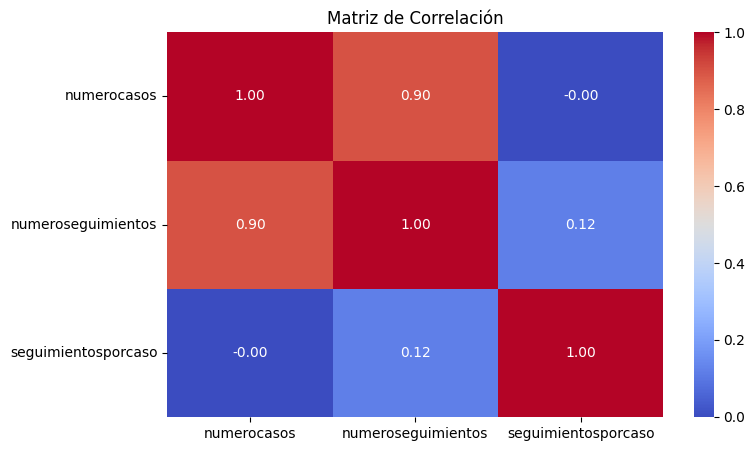

In [ ]:
# Seleccionar solo variables numéricas
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## **8. Conclusiones y recomendaciones**

- La **distribución de `numerocasos` está altamente sesgada**, con la mayoría de municipios reportando pocos casos pero con valores extremos altos.
- Algunos **departamentos tienen cifras significativamente altas** de casos reportados, lo que indica posibles zonas críticas.
- La evolución temporal de los casos sugiere **picos en momentos específicos**, posiblemente asociados a olas epidémicas.
- La **correlación entre `numerocasos` y `numeroseguimientos` es alta**, lo que indica que a más casos, más seguimientos.
- Se recomienda **revisar valores extremos en `seguimientosporcaso`**, ya que presentan anomalías numéricas.


## **9. Guardar y descargar informe en PDF**


In [ ]:
def generar_pdf():
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, "Análisis Exploratorio de Datos de Salud", ln=True, align='C')
    pdf.ln(10)
    pdf.multi_cell(0, 10, "Este informe contiene un análisis exploratorio de datos sobre casos y seguimientos de salud en Colombia. Se incluyen estadísticas descriptivas y visualizaciones gráficas.")

    # Verificar que las imágenes existen antes de agregarlas
    for img in ["histograma_casos.png", "barras_departamentos.png", "evolucion_temporal.png"]:
        if os.path.exists(img):
            pdf.ln(10)
            pdf.image(img, x=10, y=None, w=180)

    pdf.output("informe_EDA.pdf")
    files.download("informe_EDA.pdf")

# Generar el informe con gráficos
generar_pdf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Este notebook proporciona un análisis estructurado del conjunto de datos, asegurando su limpieza, transformación y validación. Los resultados obtenidos permiten evaluar la correlación entre variables clave y generar un informe de calidad para la toma de decisiones en salud pública.